In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("MPC-answers1 - Answers.csv")

In [4]:
data.groupby('Active/Passive')['Age / Edad'].mean()

Active/Passive
Active     31.925926
Passive    27.440000
Name: Age / Edad, dtype: float64

In [5]:
data.groupby('Active/Passive')['Age / Edad'].median()

Active/Passive
Active     27
Passive    27
Name: Age / Edad, dtype: int64

In [6]:
data.groupby('Active/Passive')['Age / Edad'].std()

Active/Passive
Active     11.384625
Passive     2.161789
Name: Age / Edad, dtype: float64

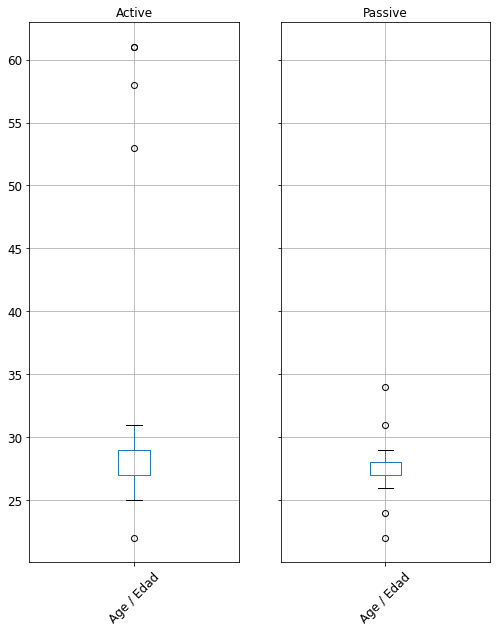

In [16]:
grouped = data.groupby('Active/Passive')
grouped.boxplot(rot=45, fontsize=12, figsize=(8,10))
#plt.savefig('Age distribution')

In [23]:
data.groupby('Active/Passive')['Gender / Género'].describe()

,count,unique,top,freq
Active/Passive,,,,
Active,27,2,M,19
Passive,25,2,M,15


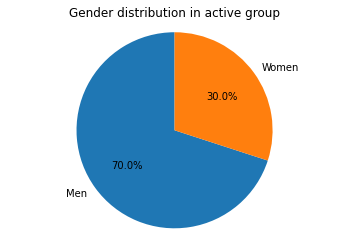

In [25]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Men', 'Women']
sizes = [70, 30]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Gender distribution in active group')
#plt.savefig('Gender distribution in active group',dpi=300)
plt.show()

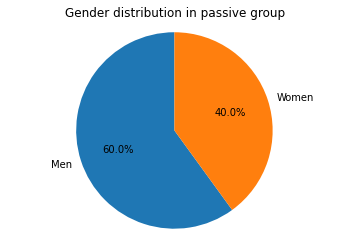

In [27]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['Men', 'Women']
sizes = [60, 40]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Gender distribution in passive group')
#plt.savefig('Gender distribution in passive group',dpi=300)
plt.show()

In [35]:
data.groupby('Active/Passive')['Country'].value_counts()

Active/Passive  Country
Active          ES         16
                CL          6
                DK          5
Passive         ES         14
                DK          5
                CL          4
                IT          1
                PT          1
Name: Country, dtype: int64

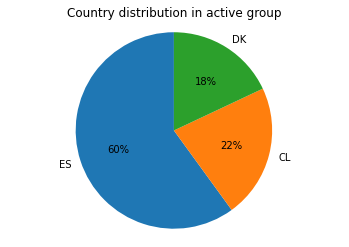

In [53]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['ES', 'CL','DK']
sizes = [60,22,18]
explode = (0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Country distribution in active group')
#plt.savefig('Country distribution in active group',dpi=300)
plt.show()

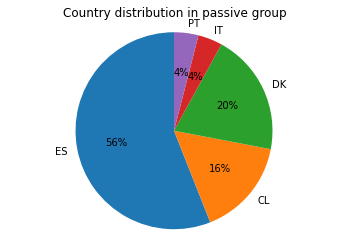

In [52]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['ES', 'CL','DK','IT','PT']
sizes = [56,16,20,4,4]
explode = (0, 0,0,0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Country distribution in passive group')
#plt.savefig('Country distribution in passive group',dpi=300)
plt.show()

In [63]:
# Spliting music preferences by words
import re

copy = data['What music genre or what kind of music did you enjoy listening to during your youth or teenage years? Feel free to add a couple of bands as an example.  / ¿Qué tipo de música o género musical te gustaba escuchar en tu juventud o adolescencia? Escriba un par de grupos musicales como ejemplo si puede.'].copy()


for i in range(len(copy)):
    lexical = []
    uniques = re.sub("[^\w]", " ",  str(copy[i])).split()
    for j in range(len(uniques)):
        lexical.append(uniques[j])
    copy[i]=lexical

In [64]:
data['sparse_music']=copy

In [66]:
genres = ['rock','Rock','pop','Pop','Hiphop','hiphop','hip','Hip','reggaeton','alternative','Alternative',
          'Indie,','indie','Electronic','electronic','Rap','rap','Reggaeton','Reggae','reggae','metal','Metal',
         'ska','Ska']

In [67]:
final_genres = []
for i in range(len(copy)):
    temp = []
    for j in genres:
        if j in copy[i]:
            temp.append(j)
    if len(temp)==0:
        temp.append('Other')
    final_genres.append(temp)

In [70]:
index_others = []
for i in range(len(final_genres)):
    if final_genres[i]==['Other']:
        index_others.append(i)

In [73]:
data['final_genres']=final_genres

In [74]:
data.to_csv('Responses.csv')

In [75]:
data = pd.read_csv("Responses.csv")

In [79]:
final_genres = data.final_genres.copy()

In [81]:
for i in range(len(final_genres)):
    for j in range(len(final_genres[i])):
        if final_genres[i][j]=='rock':
            final_genres[i][j]=='Rock'
        if final_genres[i][j]=='pop':
            final_genres[i][j]=='Pop'
        if final_genres[i][j]=='hiphop':
            final_genres[i][j]=='Hiphop'
        if final_genres[i][j]=='hip':
            final_genres[i][j]=='Hiphop'
        if final_genres[i][j]=='reggaeton':
            final_genres[i][j]=='Reggaeton'
        if final_genres[i][j]=='reggae':
            final_genres[i][j]=='Reggae'
        if final_genres[i][j]=='metal':
            final_genres[i][j]=='Metal'
        if final_genres[i][j]=='ska':
            final_genres[i][j]=='Ska'
        if final_genres[i][j]=='electronic':
            final_genres[i][j]=='Electronic'
        if final_genres[i][j]=='indie':
            final_genres[i][j]=='Indie'
        if final_genres[i][j]=='alternative':
            final_genres[i][j]=='Alternative'
        if final_genres[i][j]=='rap':
            final_genres[i][j]=='Rap'

In [82]:
for j in range(len(final_genres)):
    test = []
    word = ''
    for i in range(1,len(final_genres[j])):
        in_word = False
        if final_genres[j][i].isalpha():
            in_word = True
            word+=final_genres[j][i]
        elif final_genres[j][i].isalpha() == False and final_genres[j][i-1].isalpha():
            test.append(word)
            word = ''
        else:
            word = ''
    final_genres[j]=list(test)

In [83]:
#data['final_genres']=final_genres
#data.to_csv('Responses.csv')
data = pd.read_csv("Responses.csv")

In [85]:
genres = ['Rock','Pop','Hiphop','Reggaeton','Metal','Ska','Electronic','Indie','Alternative','Rap','Other']

In [86]:
count_Rock = []
count_Pop = []
count_Hiphop = []
count_Reggaeton = []
count_Metal = []
count_Ska = []
count_Electronic = []
count_Indie = []
count_Alternative = []
count_Rap = []
count_Other = []

In [87]:
for i in range(len(final_genres)):
    for j in range(len(final_genres[i])):
        if final_genres[i][j]=='rock':
            final_genres[i][j]='Rock'
        if final_genres[i][j]=='pop':
            final_genres[i][j]='Pop'
        if final_genres[i][j]=='hiphop':
            final_genres[i][j]='Hiphop'
        if final_genres[i][j]=='hip':
            final_genres[i][j]='Hiphop'
        if final_genres[i][j]=='reggaeton':
            final_genres[i][j]='Reggaeton'
        if final_genres[i][j]=='reggae':
            final_genres[i][j]='Reggae'
        if final_genres[i][j]=='metal':
            final_genres[i][j]='Metal'
        if final_genres[i][j]=='ska':
            final_genres[i][j]='Ska'
        if final_genres[i][j]=='electronic':
            final_genres[i][j]='Electronic'
        if final_genres[i][j]=='indie':
            final_genres[i][j]='Indie'
        if final_genres[i][j]=='alternative':
            final_genres[i][j]='Alternative'
        if final_genres[i][j]=='rap':
            final_genres[i][j]='Rap'

In [89]:
for i in range(len(final_genres)):
    if 'Rock' in final_genres[i]:
        count_Rock.append(1)
    else:
        count_Rock.append(0)
        
    if 'Hiphop' in final_genres[i]:
        count_Hiphop.append(1)
    else:
        count_Hiphop.append(0)
        
    if 'Pop' in final_genres[i]:
        count_Pop.append(1)
    else:
        count_Pop.append(0)
        
    if 'Reggaeton' in final_genres[i]:
        count_Reggaeton.append(1)
    else:
        count_Reggaeton.append(0)
        
    if 'Metal' in final_genres[i]:
        count_Metal.append(1)
    else:
        count_Metal.append(0)
        
    if 'Ska' in final_genres[i]:
        count_Ska.append(1)
    else:
        count_Ska.append(0)
        
    if 'Electronic' in final_genres[i]:
        count_Electronic.append(1)
    else:
        count_Electronic.append(0)
        
    if 'Indie' in final_genres[i]:
        count_Indie.append(1)
    else:
        count_Indie.append(0)
        
    if 'Alternative' in final_genres[i]:
        count_Alternative.append(1)
    else:
        count_Alternative.append(0)
        
    if 'Rap' in final_genres[i]:
        count_Rap.append(1)
    else:
        count_Rap.append(0)
        
    if 'Other' in final_genres[i]:
        count_Other.append(1)
    else:
        count_Other.append(0)

In [90]:
#data['final_genres']=final_genres
#data.to_csv('Responses.csv')
data = pd.read_csv("Responses.csv")

In [91]:
final_genres = data.final_genres.copy()

In [92]:
data['count_Rock'] = count_Rock
data['count_Pop'] = count_Pop
data['count_Hiphop'] = count_Hiphop
data['count_Reggaeton'] = count_Reggaeton
data['count_Metal'] = count_Metal
data['count_Ska'] = count_Ska
data['count_Electronic'] = count_Electronic
data['count_Indie'] = count_Indie
data['count_Alternative'] = count_Alternative
data['count_Rap'] = count_Rap
data['count_Other'] = count_Other

In [93]:
data['final_genres']=final_genres
data.to_csv('Responses.csv')
data = pd.read_csv("Responses.csv")

In [124]:
genre_active = [20, 9,2,3,6,2,1,0,1,3,1]
genre_passive = [12, 6,0,2,3,1,2,1,1,5,6]

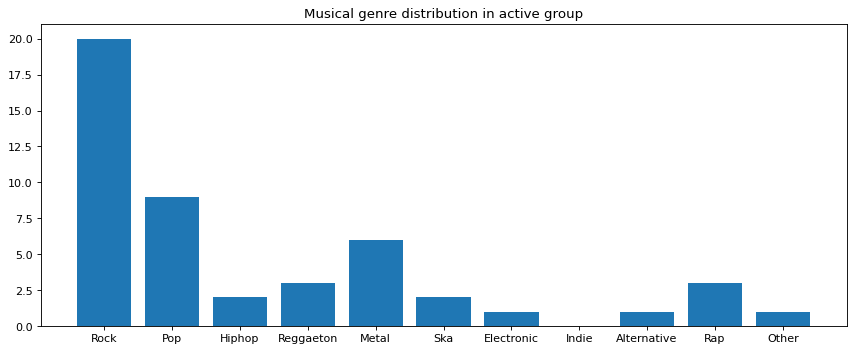

In [149]:
plt.figure(figsize=(13,5), dpi= 80)
plt.bar(genres,genre_active)
plt.title('Musical genre distribution in active group')
plt.savefig('Musical genre distribution in active group',dpi=300)

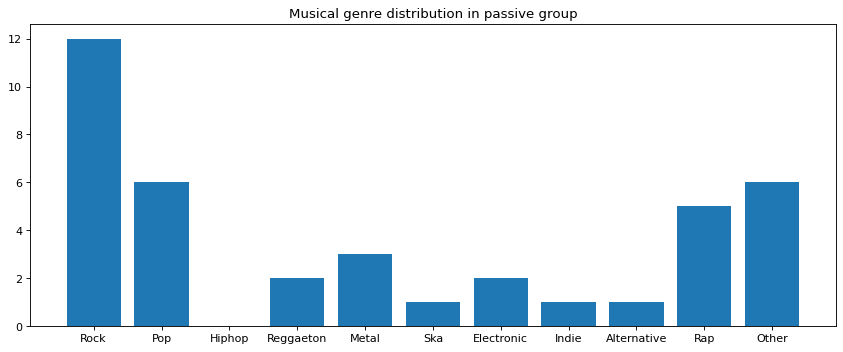

In [150]:
plt.figure(figsize=(13,5), dpi= 80)
plt.bar(genres,genre_passive)
plt.title('Musical genre distribution in passive group')
plt.savefig('Musical genre distribution in passive group',dpi=300)